## Задания для самостоятельного выполнения


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Попробуйте изменить уровень шума в данных (например, увеличить или уменьшить шум в y) и посмотрите, как это влияет на результат PCA.

In [ ]:
n_samples = 100
x = np.random.normal(0, 1, n_samples)  # Первый признак
y = 2 * x + np.random.normal(0, 0.5, n_samples)  # Второй признак (коррелирован с первым)

X = np.column_stack((x, y))

In [ ]:
x = np.random.normal(0, 1, n_samples)  # Первый признак
y = 2 * x + np.random.normal(0, 0.5, n_samples)  # Второй признак (коррелирован с первым)

In [ ]:
y_high_noise = 0.5 * x + 0.5 * x + np.random.normal(0, 0.5, 100)  # Увеличиваем шум

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

In [ ]:
X_pca_noise = pca.fit_transform(np.column_stack((x, y)))
X_pca_high_noise = pca.fit_transform(np.column_stack((x, y_high_noise)))

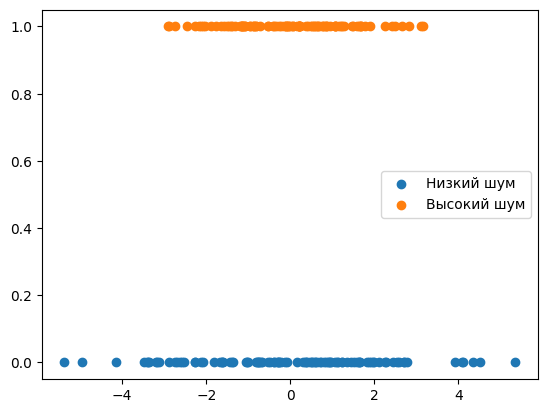

In [ ]:
plt.scatter(X_pca_noise, np.zeros_like(X_pca_noise), label="Низкий шум")
plt.scatter(X_pca_high_noise, np.ones_like(X_pca_high_noise), label="Высокий шум")
plt.legend()
plt.show()

2. Добавьте третий признак, который также коррелирует с первыми двумя, и примените PCA с n_components=2.

In [ ]:
x = np.column_stack((x, x)) if x.ndim == 1 else x

x_new = np.column_stack((x, 0.3 * x[:, 0] + 0.7 * x[:, 1] + np.random.normal(0, 0.1, x.shape[0])))
pca = PCA(n_components=2)
x_pca_new = pca.fit_transform(x_new)

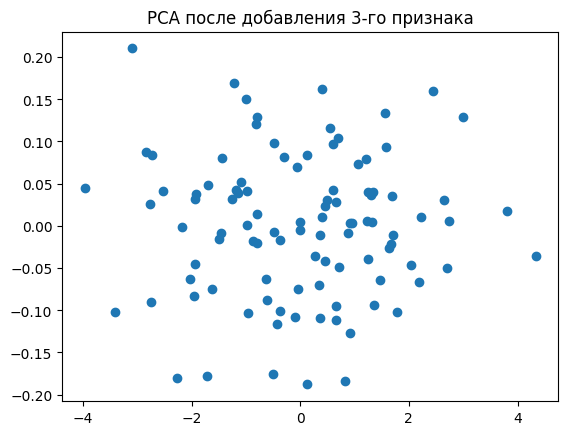

In [ ]:
plt.scatter(x_pca_new[:, 0], x_pca_new[:, 1])
plt.title("PCA после добавления 3-го признака")
plt.show()

3. Попробуйте изменить расположение классов (например, сделать их ближе друг к другу) и посмотрите, как это влияет на результат LDA.

In [ ]:
X1 = np.random.normal(0, 1, (50, 2))
X2 = np.random.normal(1, 1, (50, 2))  # Было normal(3, 1, ...)
X = np.vstack((X1, X2))
y = np.array([0] * 50 + [1] * 50)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, y)

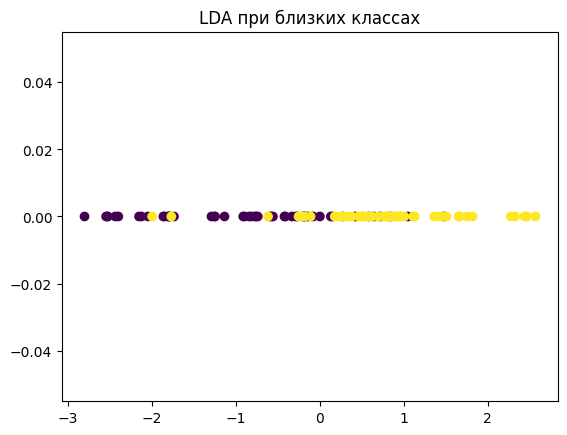

In [ ]:
plt.scatter(X_lda, np.zeros_like(X_lda), c=y)
plt.title("LDA при близких классах")
plt.show()

4. Добавьте третий класс и примените LDA с n_components=2.

In [ ]:
X3 = np.random.normal(2, 1, (50, 2))
X = np.vstack((X1, X2, X3))
y = np.array([0] * 50 + [1] * 50 + [2] * 50)

In [ ]:
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)

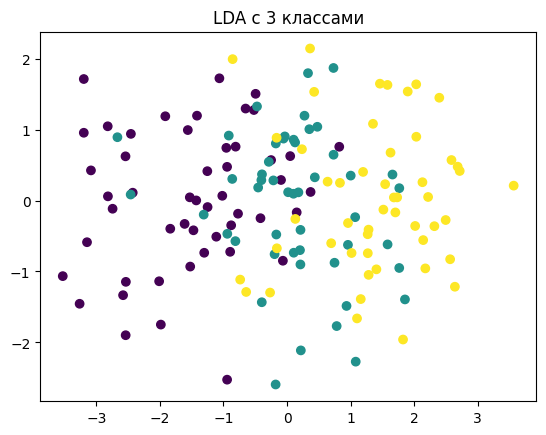

In [ ]:
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y)
plt.title("LDA с 3 классами")
plt.show()

5. Сравните LDA с PCA на этих же данных. Какой метод лучше разделяет классы?

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

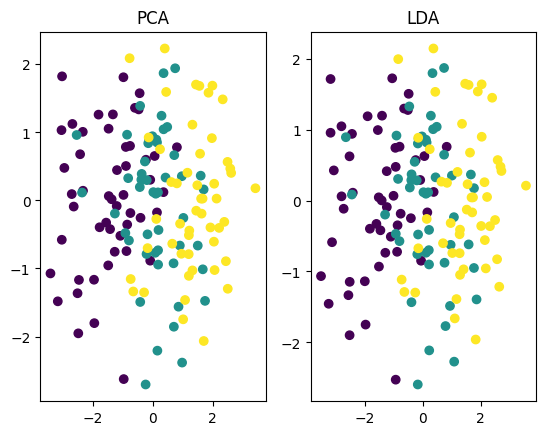

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
ax1.set_title("PCA")
ax2.scatter(X_lda[:, 0], X_lda[:, 1], c=y)
ax2.set_title("LDA")
plt.show()

6. Попробуйте изменить параметр degree для полиномиального ядра метода KernelPCA и посмотрите, как это влияет на результат.

In [ ]:
from sklearn.decomposition import KernelPCA
kpca_linear = KernelPCA(n_components=2, kernel='poly', degree=2)
X_kpca = kpca_linear.fit_transform(X)

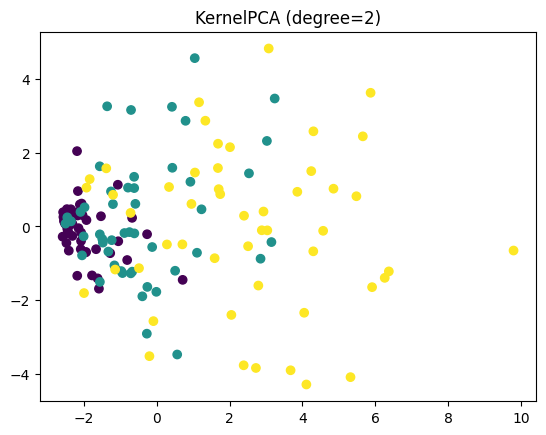

In [ ]:
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)
plt.title("KernelPCA (degree=2)")
plt.show()

In [ ]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=500, noise=0.05, factor=0.5, random_state=42)

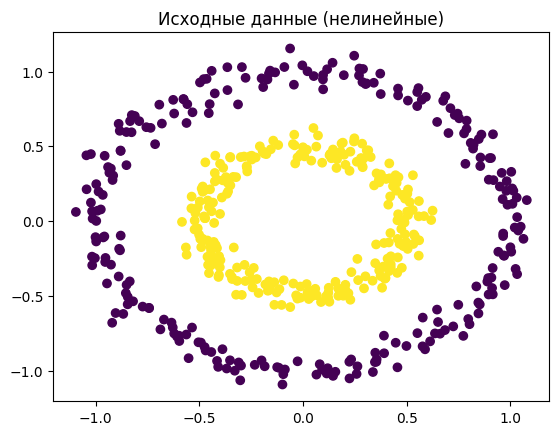

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Исходные данные (нелинейные)")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
kpca = KernelPCA(n_components=2, kernel='poly', degree=3)
X_kpca = kpca.fit_transform(X_scaled)

In [ ]:
kpca_linear = KernelPCA(n_components=2, kernel='poly', degree=1)
X_kpca_linear = kpca_linear.fit_transform(X_kpca)

In [ ]:
kpca_quad = KernelPCA(n_components=2, kernel='poly', degree=2)
X_kpca_quad = kpca_quad.fit_transform(X_kpca)

In [ ]:
kpca_cubic = KernelPCA(n_components=2, kernel='poly', degree=3)
X_kpca_cubic = kpca_cubic.fit_transform(X_kpca)

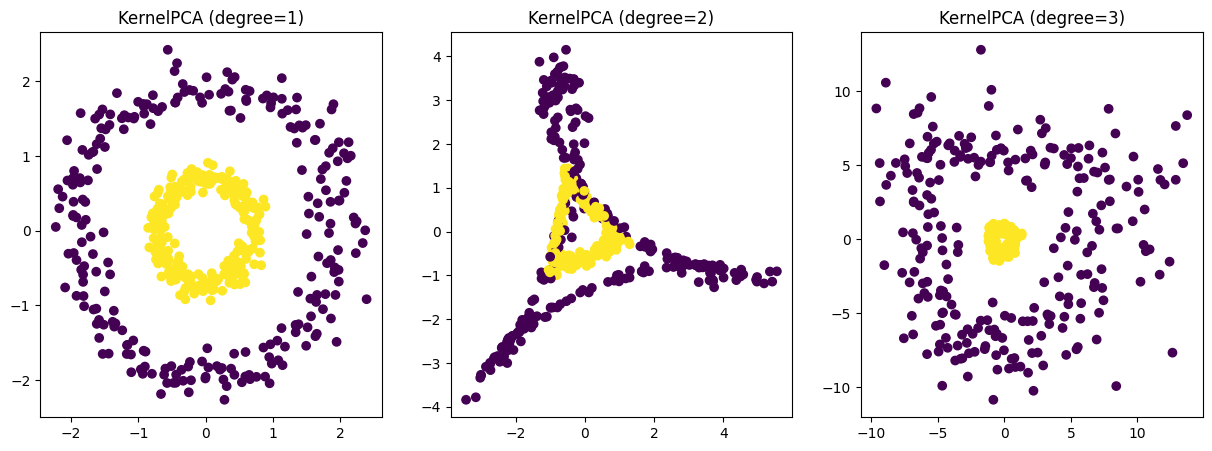

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.scatter(X_kpca_linear[:, 0], X_kpca_linear[:, 1], c=y, cmap='viridis')
ax1.set_title("KernelPCA (degree=1)")
ax2.scatter(X_kpca_quad[:, 0], X_kpca_quad[:, 1], c=y, cmap='viridis')
ax2.set_title("KernelPCA (degree=2)")
ax3.scatter(X_kpca_cubic[:, 0], X_kpca_cubic[:, 1], c=y, cmap='viridis')
ax3.set_title("KernelPCA (degree=3)")
plt.show()

7. Примените все три изученных в этой работе метода к датасету для классификации по вашему выбору.

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()
X, y = iris.data, iris.target

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [ ]:
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)

In [ ]:
kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X)

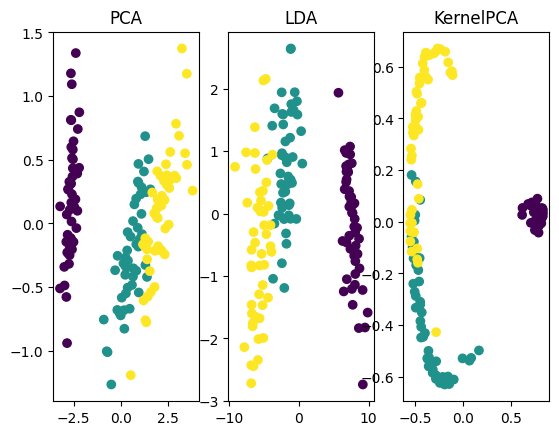

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
ax1.set_title("PCA")
ax2.scatter(X_lda[:, 0], X_lda[:, 1], c=y)
ax2.set_title("LDA")
ax3.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)
ax3.set_title("KernelPCA")
plt.show()

8. Исследуйте влияние аргумента perplexity на результат работы алгоритма на многомерных данных.

In [ ]:
from sklearn.manifold import TSNE
tsne_30 = TSNE(perplexity=20)
X_tsne_30 = tsne_30.fit_transform(X)

In [ ]:
tsne_5 = TSNE(perplexity=5)
X_tsne_5 = tsne_5.fit_transform(X)

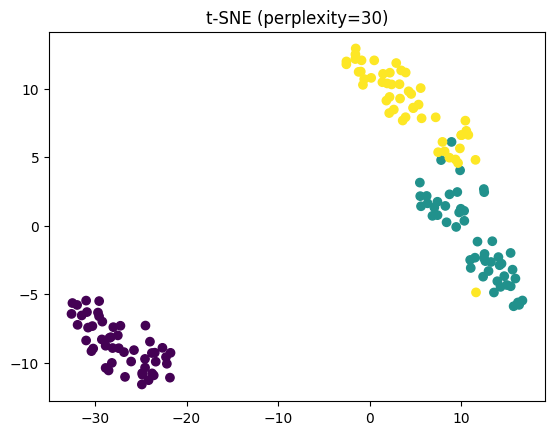

In [ ]:
plt.scatter(X_tsne_30[:, 0], X_tsne_30[:, 1], c=y)
plt.title("t-SNE (perplexity=30)")
plt.show()

10. Сравните все три алгоритма классификации по метрике доли объясненной дисперсии. Выберите для каждого метода оптимальное количество кластеров по методу локтя.

In [ ]:
iris = load_iris()
X, y = iris.data, iris.target
X_scaled = StandardScaler().fit_transform(X)

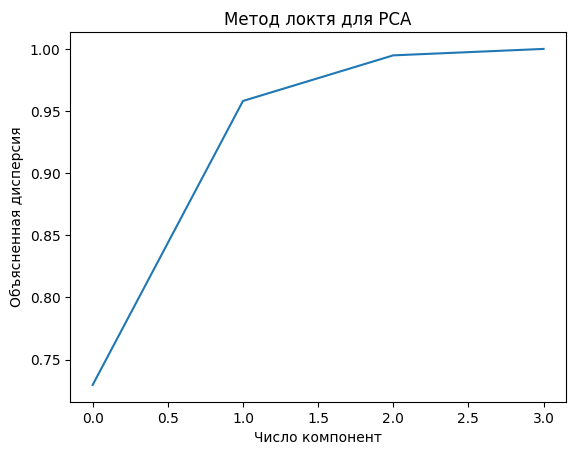

PCA: [0.72962445 0.22850762 0.03668922 0.00517871]


In [ ]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
eigenvalues_pca = pca.explained_variance_ratio_
plt.plot(np.cumsum(eigenvalues_pca))
plt.xlabel("Число компонент")
plt.ylabel("Объясненная дисперсия")
plt.title("Метод локтя для PCA")
plt.show()
print(f"PCA: {eigenvalues_pca}")

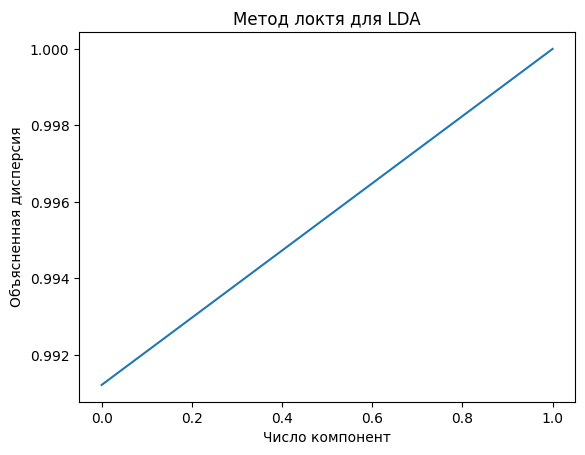

LDA:  [0.9912126 0.0087874]


In [ ]:
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

eigenvalues = lda.explained_variance_ratio_

plt.plot(np.cumsum(eigenvalues))
plt.xlabel("Число компонент")
plt.ylabel("Объясненная дисперсия")
plt.title("Метод локтя для LDA")
plt.show()

print("LDA: ", eigenvalues)

In [ ]:
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=10)
X_kpca = kpca.fit_transform(X_scaled)

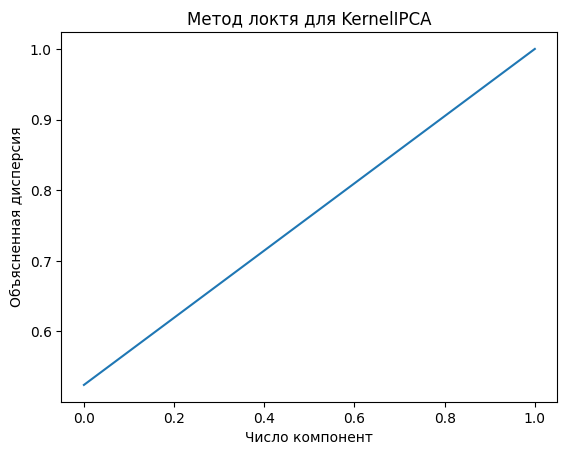

KernelPCA:  [0.52425078 0.47574922]


In [ ]:
total_var = np.var(X_kpca, axis=0).sum()
explained_var = np.var(X_kpca, axis=0) / total_var

plt.plot(np.cumsum(explained_var))
plt.xlabel("Число компонент")
plt.ylabel("Объясненная дисперсия")
plt.title("Метод локтя для KernelIPCA")
plt.show()

print("KernelPCA: ", explained_var)

11. Повторите измерение метрики, но уже после разбиения выборки на тестовую и обучающую. Сравните долю объясненной дисперсии на тестовой выборке.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
pca = PCA(n_components=2).fit(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
print("Объясненная дисперсия на тесте:", np.sum(pca.explained_variance_ratio_))

Объясненная дисперсия на тесте: 0.9767430277988375


In [ ]:
pca.explained_variance_ratio_

array([0.91959926, 0.05714377])

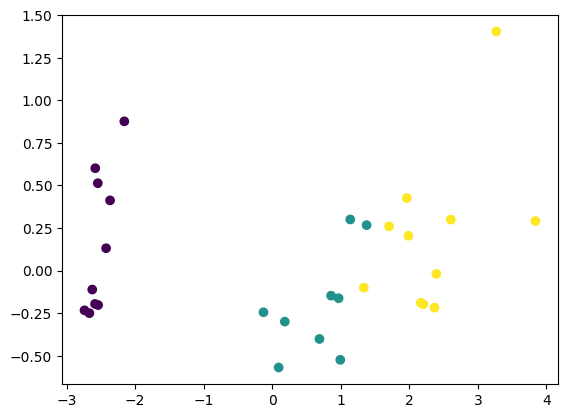

In [ ]:
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test)